# Red Neuronal de clasificacion de generos musicales

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

from yellowbrick.model_selection import FeatureImportances
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import mean_squared_error


import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('music_genre.csv')
data

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,58878.0,BEXEY,GO GETTA,59.0,0.03340,0.913,-1.0,0.574,0.00000,C#,0.119,-7.022,Major,0.2980,98.02799999999999,4-Apr,0.330,Hip-Hop
50001,43557.0,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.00000,B,0.109,-9.814,Major,0.0550,122.04299999999999,4-Apr,0.113,Hip-Hop
50002,39767.0,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.00000,D,0.143,-5.443,Major,0.1460,131.079,4-Apr,0.395,Hip-Hop
50003,57944.0,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.00000,G,0.106,-5.016,Minor,0.0441,75.88600000000001,4-Apr,0.354,Hip-Hop


<AxesSubplot:>

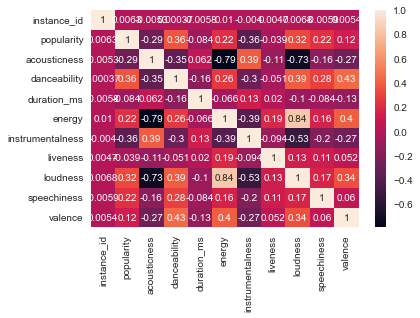

In [3]:
plt.plot(figsize=(15,15))
sns.heatmap(data.corr(),annot=True)

In [4]:
data.columns

Index(['instance_id', 'artist_name', 'track_name', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'obtained_date', 'valence', 'music_genre'],
      dtype='object')

In [5]:
data.dtypes

instance_id         float64
artist_name          object
track_name           object
popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo                object
obtained_date        object
valence             float64
music_genre          object
dtype: object

In [6]:
data['music_genre'].value_counts()

Electronic     5000
Anime          5000
Jazz           5000
Alternative    5000
Country        5000
Rap            5000
Blues          5000
Rock           5000
Classical      5000
Hip-Hop        5000
Name: music_genre, dtype: int64

In [7]:
data.isna().sum()

instance_id         5
artist_name         5
track_name          5
popularity          5
acousticness        5
danceability        5
duration_ms         5
energy              5
instrumentalness    5
key                 5
liveness            5
loudness            5
mode                5
speechiness         5
tempo               5
obtained_date       5
valence             5
music_genre         5
dtype: int64

In [8]:
columns = ['key','mode','tempo']
for column in columns:
    print(data[column].unique())

['A#' 'D' 'G#' 'C#' 'F#' 'B' 'G' 'F' 'A' 'C' 'E' 'D#' nan]
['Minor' 'Major' nan]
['100.889' '115.00200000000001' '127.994' ... '112.97' '167.655'
 '99.20100000000001']


In [9]:
data = data.dropna(axis=0)
data

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,58878.0,BEXEY,GO GETTA,59.0,0.03340,0.913,-1.0,0.574,0.00000,C#,0.119,-7.022,Major,0.2980,98.02799999999999,4-Apr,0.330,Hip-Hop
50001,43557.0,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.00000,B,0.109,-9.814,Major,0.0550,122.04299999999999,4-Apr,0.113,Hip-Hop
50002,39767.0,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.00000,D,0.143,-5.443,Major,0.1460,131.079,4-Apr,0.395,Hip-Hop
50003,57944.0,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.00000,G,0.106,-5.016,Minor,0.0441,75.88600000000001,4-Apr,0.354,Hip-Hop


In [13]:
dummiesKey = pd.get_dummies(data.key)
dummiesKey

,A,A#,B,C,C#,D,D#,E,F,F#,G,G#
0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
50000,0,0,0,0,1,0,0,0,0,0,0,0
50001,0,0,1,0,0,0,0,0,0,0,0,0
50002,0,0,0,0,0,1,0,0,0,0,0,0
50003,0,0,0,0,0,0,0,0,0,0,1,0


In [10]:
def preprocess_inputs(df):
    df = df.copy()
    
    df = df.drop(['instance_id','artist_name','track_name','obtained_date'],axis=1)

    df['mode'] = df['mode'].replace({'Minor' : 0,
                                     'Major' : 1})

    #embarked_dummies = pd.get_dummies(df.key)
    #df = pd.concat([df, embarked_dummies], axis=1)
    df = df.drop('key',axis=1)
    
    df['tempo'] = df['tempo'].replace('?',np.nan)
    df["tempo"] = df["tempo"].astype("float")
    df['tempo'] = df['tempo'].fillna(df['tempo'].mean())
     
    df['music_genre'] = df['music_genre'].replace({'Electronic':0, 'Anime':1, 'Jazz':2, 'Alternative':3, 'Country':4, 'Rap':5,
                                                   'Blues':5, 'Rock':6, 'Classical':7, 'Hip-Hop':8})    
    
    y = df['music_genre']# prediccion target
    X = df.drop('music_genre',axis=1) #
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, shuffle=True, random_state=43)
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train), index = X_train.index, columns = X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index = X_test.index, columns = X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [11]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

X_train

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence
35722,0.695409,-0.894969,-1.330786,0.254421,0.685307,-0.560018,-0.614382,0.913892,0.750605,-0.599752,0.998464,-0.879392
47351,0.438074,-0.490244,-0.728482,-0.586751,-0.278936,-0.559793,2.523664,0.182083,-1.332259,1.097496,1.781968,0.497315
31954,-0.591269,-0.175101,-0.377138,0.078435,0.417881,-0.500760,-0.394298,0.344922,-1.332259,-0.374899,1.371669,0.857688
24452,-0.205266,-0.871917,0.225166,-1.743968,0.323716,-0.557196,-0.524123,0.344922,0.750605,-0.332492,-0.000177,0.412283
21511,0.502408,-0.154675,0.894392,-0.094295,0.014857,-0.515190,1.707624,0.114368,0.750605,-0.611586,-0.069791,0.995359
...,...,...,...,...,...,...,...,...,...,...,...,...
25238,2.046422,-0.852950,-1.057518,-0.054265,0.741806,-0.560018,-0.768935,0.683821,-1.332259,-0.112570,1.721463,-1.110192
18453,0.052070,-0.428966,-1.358670,0.691708,-0.034108,-0.560018,-0.631692,0.265115,0.750605,-0.590876,-0.000177,-1.243814
40758,-0.848605,1.934608,-0.895789,2.283691,-1.759199,2.261665,-0.722569,-1.000839,-1.332259,-0.546497,-1.194666,-1.426025
19781,0.245072,-0.866957,1.647272,-1.743968,-0.395699,-0.557304,0.069361,-0.281606,-1.332259,1.058048,-0.848241,-0.462330


In [30]:
df = pd.concat([X_train,  pd.get_dummies(dummiesKey)], axis=1)
x_train=df.dropna(axis=0)
x_train

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,...,B,C,C#,D,D#,E,F,F#,G,G#
35722,0.695409,-0.894969,-1.330786,0.254421,0.685307,-0.560018,-0.614382,0.913892,0.750605,-0.599752,...,0,0,0,0,0,0,1,0,0,0
47351,0.438074,-0.490244,-0.728482,-0.586751,-0.278936,-0.559793,2.523664,0.182083,-1.332259,1.097496,...,0,0,0,0,0,0,0,0,0,0
31954,-0.591269,-0.175101,-0.377138,0.078435,0.417881,-0.500760,-0.394298,0.344922,-1.332259,-0.374899,...,0,0,0,0,0,0,0,0,0,0
24452,-0.205266,-0.871917,0.225166,-1.743968,0.323716,-0.557196,-0.524123,0.344922,0.750605,-0.332492,...,1,0,0,0,0,0,0,0,0,0
21511,0.502408,-0.154675,0.894392,-0.094295,0.014857,-0.515190,1.707624,0.114368,0.750605,-0.611586,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25238,2.046422,-0.852950,-1.057518,-0.054265,0.741806,-0.560018,-0.768935,0.683821,-1.332259,-0.112570,...,0,0,1,0,0,0,0,0,0,0
18453,0.052070,-0.428966,-1.358670,0.691708,-0.034108,-0.560018,-0.631692,0.265115,0.750605,-0.590876,...,0,1,0,0,0,0,0,0,0,0
40758,-0.848605,1.934608,-0.895789,2.283691,-1.759199,2.261665,-0.722569,-1.000839,-1.332259,-0.546497,...,0,0,0,1,0,0,0,0,0,0
19781,0.245072,-0.866957,1.647272,-1.743968,-0.395699,-0.557304,0.069361,-0.281606,-1.332259,1.058048,...,0,0,0,0,0,0,0,0,0,0


In [35]:
models = {
    "                   Logistic Regression": LogisticRegression(),
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "   Support Vector Machine (RBF Kernel)": SVC(),
    "                        Neural Network": MLPClassifier(),
    "                         Random Forest": RandomForestClassifier(),
    "                     Gradient Boosting": GradientBoostingClassifier(),
    "                    Bagging Classifier": BaggingClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

                   Logistic Regression trained.
                   K-Nearest Neighbors trained.
                         Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.
                        Neural Network trained.
                         Random Forest trained.
                     Gradient Boosting trained.
                    Bagging Classifier trained.


In [36]:
for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(X_test, y_test) * 100))

                   Logistic Regression: 47.81%
                   K-Nearest Neighbors: 48.48%
                         Decision Tree: 43.08%
Support Vector Machine (Linear Kernel): 47.02%
   Support Vector Machine (RBF Kernel): 56.58%
                        Neural Network: 58.21%
                         Random Forest: 55.06%
                     Gradient Boosting: 58.23%
                    Bagging Classifier: 51.50%


In [37]:
#tuvo un error y se le tuvo que agregar shuffle=True
cv_method = StratifiedKFold(n_splits=3,random_state=42,shuffle=True)

In [38]:
scores_Logistic = cross_val_score(LogisticRegression(), X_train, y_train, cv =cv_method, n_jobs = 2, scoring = "accuracy")

print(f"Scores(Cross validate) for Logistic Regression model:\n{scores_Logistic}")
print(f"CrossValMeans: {round(scores_Logistic.mean(), 3)}")
print(f"CrossValStandard Deviation: {round(scores_Logistic.std(), 3)}")

Scores(Cross validate) for Logistic Regression model:
[0.48718608 0.47347219 0.47805589]
CrossValMeans: 0.48
CrossValStandard Deviation: 0.006


In [39]:
params_LR = {"tol": [0.0001,0.0002,0.0003],
            "C": [0.01, 0.1, 1, 10, 100],
            "intercept_scaling": [1, 2, 3, 4]
              }
GridSearchCV_LR = GridSearchCV(estimator=LogisticRegression(), 
                                param_grid=params_LR, 
                                cv=cv_method,
                                verbose=1, 
                                n_jobs=2,
                                scoring="accuracy", 
                                return_train_score=True
                                )

In [40]:
GridSearchCV_LR.fit(X_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=LogisticRegression(), n_jobs=2,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'intercept_scaling': [1, 2, 3, 4],
                         'tol': [0.0001, 0.0002, 0.0003]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [41]:
best_estimator_LR = GridSearchCV_LR.best_estimator_
print(f"Best estimator for LR model:\n{best_estimator_LR}")

Best estimator for LR model:
LogisticRegression(C=1)


In [42]:
best_params_LR = GridSearchCV_LR.best_params_
print(f"Best parameter values for LR model:\n{best_params_LR}")

Best parameter values for LR model:
{'C': 1, 'intercept_scaling': 1, 'tol': 0.0001}


In [43]:
print(f"Best score for LR model: {round(GridSearchCV_LR.best_score_, 3)}")

Best score for LR model: 0.48


In [44]:
logistic_regression = LogisticRegression(C=100, intercept_scaling=1, tol=0.0001, penalty="l2", solver="liblinear", random_state=42)
logistic_regression_mod = logistic_regression.fit(X_train, y_train)
pred_logistic_regression = logistic_regression_mod.predict(X_test)

mse_logistic_regression = mean_squared_error(y_test, pred_logistic_regression)
rmse_logistic_regression = np.sqrt(mean_squared_error(y_test, pred_logistic_regression))
score_logistic_regression_train = logistic_regression_mod.score(X_train, y_train)
score_logistic_regression_test = logistic_regression_mod.score(X_test, y_test)

print(f"Mean Square Error for Logistic Regression = {round(mse_logistic_regression, 3)}")
print(f"Root Mean Square Error for Logistic Regression = {round(rmse_logistic_regression, 3)}")
print(f"R^2(coefficient of determination) on training set = {round(score_logistic_regression_train, 3)}")
print(f"R^2(coefficient of determination) on testing set = {round(score_logistic_regression_test, 3)}")

Mean Square Error for Logistic Regression = 5.115
Root Mean Square Error for Logistic Regression = 2.262
R^2(coefficient of determination) on training set = 0.479
R^2(coefficient of determination) on testing set = 0.477


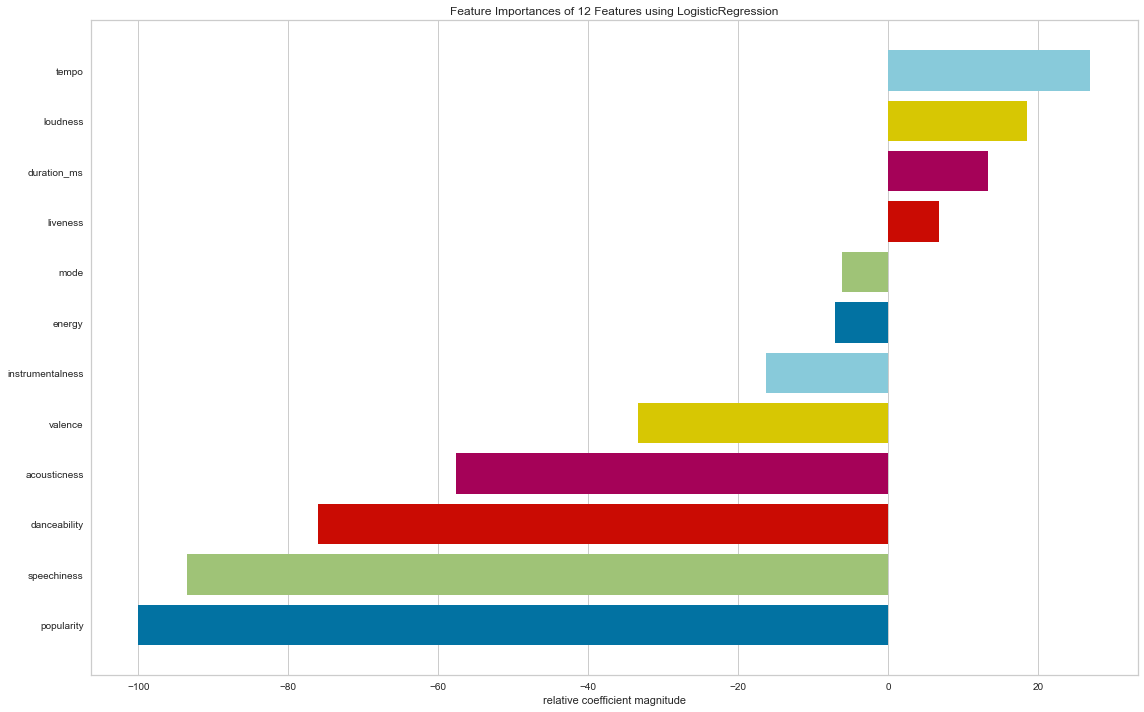

<AxesSubplot:title={'center':'Feature Importances of 12 Features using LogisticRegression'}, xlabel='relative coefficient magnitude'>

In [45]:
plt.figure(figsize=(16,10))
viz = FeatureImportances(LogisticRegression())
viz.fit(X_train, y_train)
viz.show()

In [46]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))

x = tf.keras.layers.Dense(128,activation='relu')(inputs)
x = tf.keras.layers.Dense(128,activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(9, activation='linear')(x)

model = tf.keras.Model(inputs = inputs, outputs = outputs)

model.compile(
    optimizer='adam',
    loss = 'mse')


history = model.fit(
X_train,
y_train,
epochs=15,
batch_size=32)

print(model.summary())

Epoch 1/15
1094/1094 [==============================] - 4s 3ms/step - loss: 3.9133
Epoch 2/15
1094/1094 [==============================] - 4s 3ms/step - loss: 3.2768
Epoch 3/15
1094/1094 [==============================] - 3s 3ms/step - loss: 3.1491
Epoch 4/15
1094/1094 [==============================] - 3s 3ms/step - loss: 3.0821
Epoch 5/15
1094/1094 [==============================] - 4s 4ms/step - loss: 3.0155
Epoch 6/15
1094/1094 [==============================] - 4s 3ms/step - loss: 2.9736
Epoch 7/15
1094/1094 [==============================] - 3s 3ms/step - loss: 2.9305
Epoch 8/15
1094/1094 [==============================] - 4s 3ms/step - loss: 2.9017
Epoch 9/15
1094/1094 [==============================] - 3s 3ms/step - loss: 2.8560
Epoch 10/15
1094/1094 [==============================] - 4s 3ms/step - loss: 2.8377
Epoch 11/15
1094/1094 [==============================] - 3s 3ms/step - loss: 2.8090
Epoch 12/15
1094/1094 [==============================] - 4s 4ms/step - loss: 2.7957
E

In [44]:
ypred = model.predict(X_test)

print(model.evaluate(X_train, y_train, return_dict=True))

1094/1094 [==============================] - 3s 2ms/step - loss: 10.5226
{'loss': 10.52260971069336}
